In [1]:
import pandas as pd
import matplotlib.pyplot as plt


AVTO.NET – ANALIZA OGLASOV

SEMINARSKA NALOGA PRI PREDMETU UVOD V PROGRAMIRANJE 2024/2025

PATRICIJA COKAN

V svoji seminarski nalogi sem analizirala podatke o avtomobilskih oglasih. Oglase sem s pomočjo knjižnic requests in BeautifulSoup pridobila iz spletne strani avto.net. Vsi podatki, ki jih uporabljam v svojem projektu, so javne narave in dostopni na povezavi https://www.avto.net. Podatke sem za namen analize pretvorila v dve obliki zapisa, in sicer .json in .csv, tako kot je bilo prikazano na posnetkih vaj, ki sem si jih ogledala v spletni učilnici.
Kot se je izkazalo, ima spletna stran avto.net kar nekaj zaščit proti spletnemu pajkanju (web scraping). Ko sem prvič poskusila pridobiti HTML-kodo posamezne strani, sem dobila le odgovor z opozorilom, da me je stran blokirala. Težavo sem nato delno rešila tako, da sem v svojo Python kodo dodala spremenljivko headers in jo uporabila pri pošiljanju zahtevkov na spletno stran. Poleg tega sem dodala še naključno čakanje med posameznimi zahtevki, kar je rezultate dodatno izboljšalo.
Po teh spremembah sem uspela pridobiti kar nekaj veljavnih strani, vendar jih je bilo še vedno veliko neveljavnih. Veljavnost strani sem določala glede na količino podatkov: pri manjših straneh je šlo za napako, pri večjih pa za veljavne strani. V mapo s podatki sem tako shranjevala le veljavne strani. Ko sem kodo pognala večkrat, so nekatere strani, ki so bile prej neveljavne, postale veljavne in sem jih lahko dodala v zbirko podatkov. Na ta način sem z večkratnim poganjanjem kode uspela pridobiti veliko število veljavnih strani.
Pri večkratnem poganjanju sem vsakič preverila, ali je določena stran že med veljavnimi podatki, in če je bila, sem jo preskočila. Tako sem se izognila morebitnemu ponovnemu branju strani, ki sem jih enkrat že uspešno prebrala.

Ko sem pridobila zadostno količino strani, sem pripravila dve glavni Python funkciji. Prva funkcija iz vseh spletnih strani izloči posamezne oglase, ki jih najde na strani, druga pa iz teh oglasov pridobi podatke za vsak oglas posebej. Poleg teh dveh funkcij sem pripravila še funkcijo, ki očisti besedilo tako, da določene prej kodirane znake zamenja z dejanskimi črkami. Vse tri funkcije se izvajajo znotraj glavne (main) funkcije.

Posamezen oglas za avto ima več atributov, in sicer: ime, cena, prva registracija, kilometrina, gorivo, menjalnik in motor. Podatke sem po osnovni analizi dodatno pretvorila v preglednejšo obliko, da so bili bolj primerni za nadaljnjo obdelavo. Odstranila sem odvečne presledke, razdelila ime avtomobila in znamko na dva ločena stolpca, odstranila enote ter jih zapisala kar v imenu stolpca ipd. Na ta način sem pridobila podatke, s katerimi je bilo nadaljnje delo enostavnejše in pri katerih sem imela manj težav s pretvorbo v pravilne podatkovne tipe, odstranjevanjem enot pri seštevanju podatkov ipd.

ANALIZA:

1. ZASTOPANOST POSAMEZNIH ZNAMK NA AVTO.NET

    Podatke sem razdelila glede na znamko avtomobila in primerjala, koliko oglasov na spletni strani pripada posamezni znamki. Izračunala sem tudi tržni delež posamezne znamke avtomobila na avto.net. Kot se je izkazalo, je s 111 oglasi in 13,74-odstotnim tržnim deležem na prvem mestu Volkswagen. Sledita mu BMW in Audi, nato še Mercedes-Benz ter ostale znamke. Rezultate sem prikazala tudi s pomočjo  grafikona, kjer lahko vizualno jasno vidimo vse znamke in število oglasov posamezne znamke.

10 NAJBOLJ ZASTOPANIH ZNAMK AVTOMOBILOV NA AVTO.NET:

Volkswagen: 111, TRŽNI DELEŽ: 13.74%
BMW: 83, TRŽNI DELEŽ: 10.27%
Audi: 76, TRŽNI DELEŽ: 9.41%
Mercedes-Benz: 66, TRŽNI DELEŽ: 8.17%
Peugeot: 53, TRŽNI DELEŽ: 6.56%
Citroën: 51, TRŽNI DELEŽ: 6.31%
Opel: 48, TRŽNI DELEŽ: 5.94%
Renault: 45, TRŽNI DELEŽ: 5.57%
Škoda: 43, TRŽNI DELEŽ: 5.32%
Ford: 26, TRŽNI DELEŽ: 3.22%


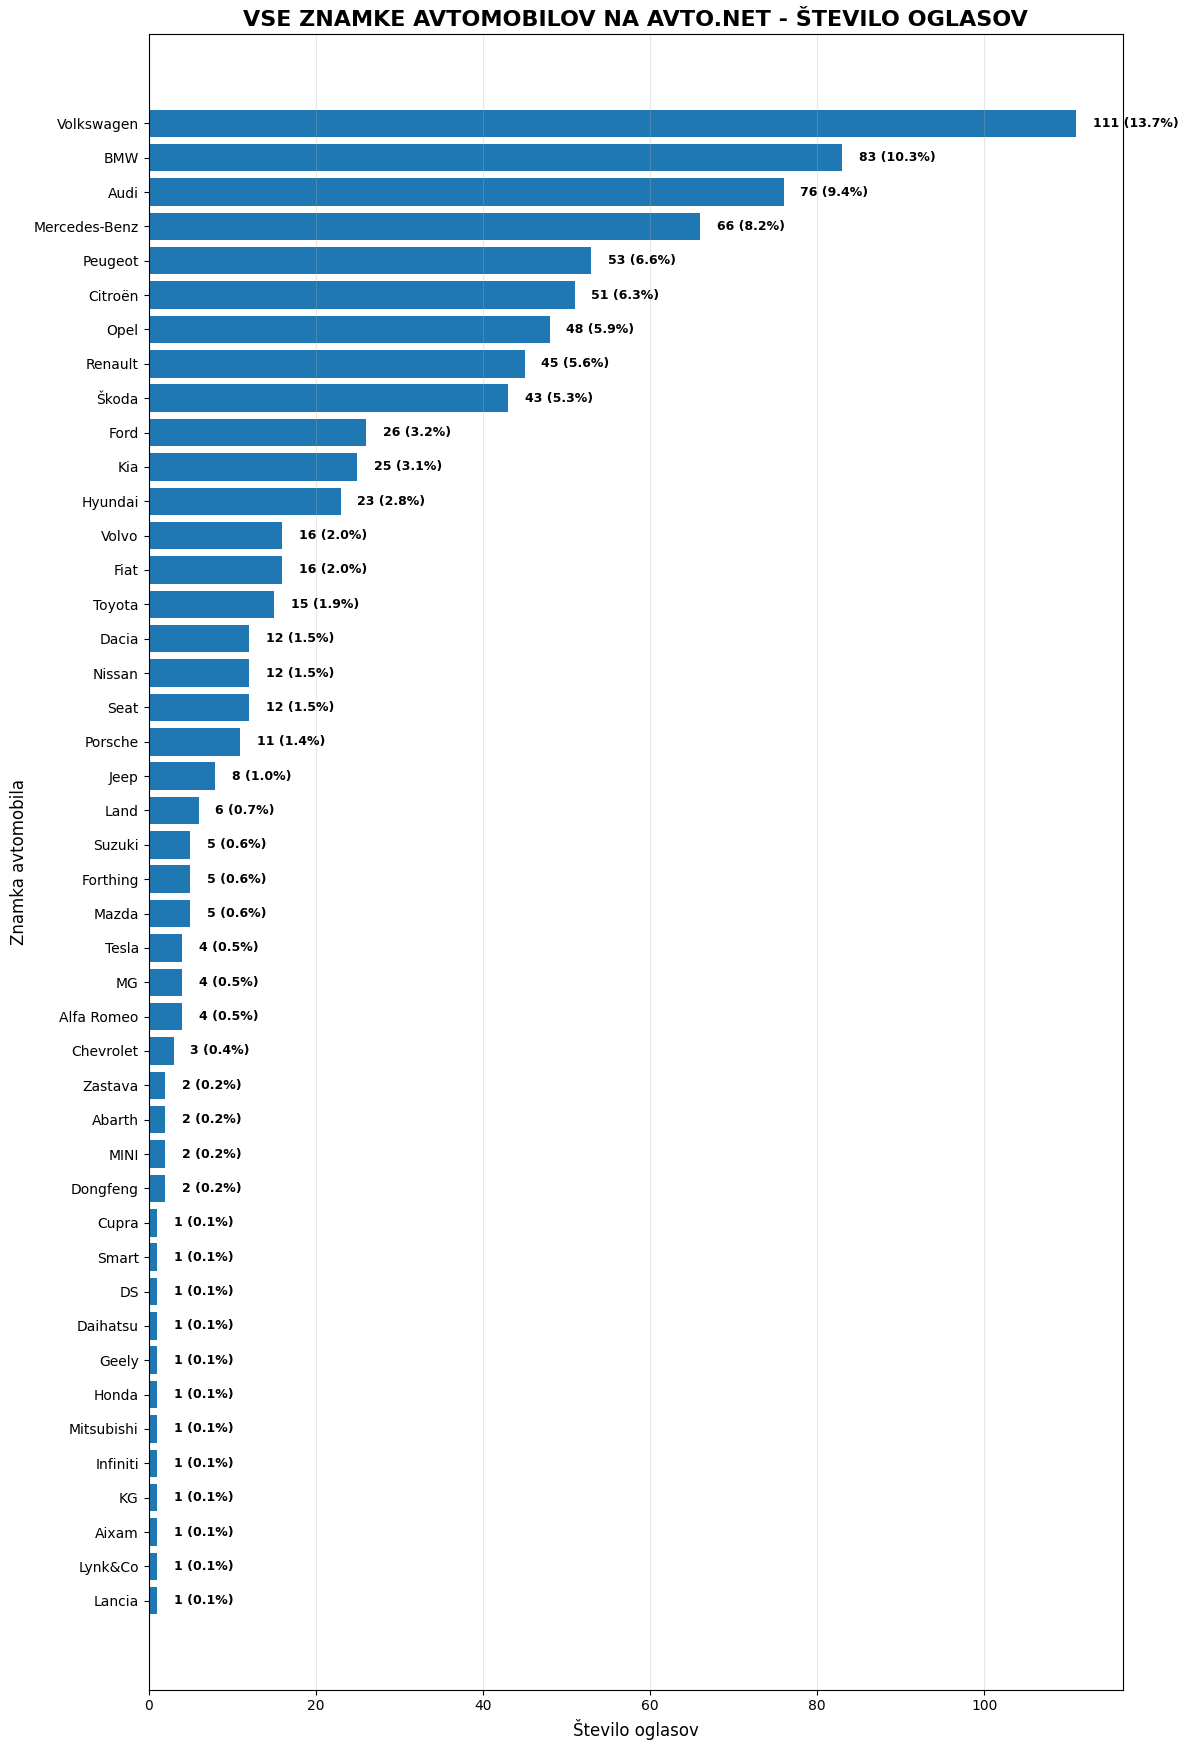

In [2]:
podatki = pd.read_csv("oglasi_avto.csv")
st_vseh_oglsov = len(podatki)
st_oglsov_znamke = podatki.groupby("Znamka")["Znamka"].count()
st_oglsov_znamke = st_oglsov_znamke.sort_values(ascending=False)
deset_najvecjih_znamk = st_oglsov_znamke.head(10)
print("10 NAJBOLJ ZASTOPANIH ZNAMK AVTOMOBILOV NA AVTO.NET:")
print()
for znamka, st_oglsov in deset_najvecjih_znamk.items():
    print(f"{znamka}: {st_oglsov}, TRŽNI DELEŽ: {st_oglsov/st_vseh_oglsov:.2%}")
st_oglsov_znamke = st_oglsov_znamke.sort_values(ascending=True)
plt.figure(figsize=(12, max(8, len(st_oglsov_znamke) * 0.4))) 
bars = plt.barh(range(len(st_oglsov_znamke)), st_oglsov_znamke.values)
plt.yticks(range(len(st_oglsov_znamke)), st_oglsov_znamke.index)

plt.title('VSE ZNAMKE AVTOMOBILOV NA AVTO.NET - ŠTEVILO OGLASOV', fontsize=16, fontweight='bold')
plt.xlabel('Število oglasov', fontsize=12)
plt.ylabel('Znamka avtomobila', fontsize=12)

for i, bar in enumerate(bars):
    width = bar.get_width()
    trzni_delez = width / st_vseh_oglsov
    plt.text(width + 2, bar.get_y() + bar.get_height()/2., 
             f'{width} ({trzni_delez:.1%})', 
             ha='left', va='center', fontweight='bold', fontsize=9)
plt.tight_layout()
plt.grid(axis='x', alpha=0.3)

plt.show()


2. VREDNOST OGLASOV POSAMEZNE ZNAMKE

Poleg tega, koliko oglasov ima posamezna znamka na platformi, me je zanimalo tudi, kakšna je skupna vrednost oglasov posamezne znamke. Tako kot prej sem oglase združila v skupine glede na znamko in izračunala skupno vrednost vseh oglasov te znamke. Pred tem sem iz podatkov odstranila vse vrstice, kjer cena vozila ni bila navedena, saj bi takšni vnosi onemogočili seštevanje skupne vrednosti. Če primerjamo podatke o tržnih deležih z vrednostjo vseh oglasov, hitro opazimo, da se vrstni red najbolj zastopanih znamk na trgu razlikuje od seznama najvrednejših. Volkswagen ima največ oglasov in največji tržni delež, vendar ga po skupni vrednosti preseže BMW, ki skupaj z Mercedes-Benzom in Audijem izstopa zaradi višjih cen vozil, čeprav imajo ti proizvajalci manj oglasov kot Volkswagen. Medtem ko so Citroën, Opel in Ford med prvimi desetimi znamkami po številu oglasov, jih ni na seznamu najvrednejših, kar nakazuje, da so njihovi avtomobili povprečno cenejši. Po drugi strani se med najvrednejše znamke uvrstijo Porsche, Kia in Hyundai, čeprav nimajo velikega števila oglasov, kar pomeni, da njihovi modeli dosegajo višje cene in s tem dvigujejo skupno vrednost. Rezultati tako jasno pokažejo razliko med priljubljenostjo znamke glede na število oglasov in njenim dejanskim finančnim pomenom na trgu.

SKUPNA VREDNOST OGLASOV POSAMEZNIH ZNAMK:

10 NAJBOLJ VREDNIH ZNAMK:
BMW: 1,608,547 EUR
Volkswagen: 1,361,903 EUR
Mercedes-Benz: 987,663 EUR
Audi: 966,854 EUR
Škoda: 604,847 EUR
Porsche: 350,587 EUR
Kia: 305,660 EUR
Hyundai: 277,218 EUR
Peugeot: 251,597 EUR
Renault: 242,327 EUR

10 NAJMANJ VREDNIH ZNAMK:
Cupra: 23,800 EUR
Tesla: 22,000 EUR
Mazda: 18,400 EUR
Zastava: 14,700 EUR
Nissan: 12,180 EUR
Chevrolet: 10,489 EUR
Smart: 7,990 EUR
Honda: 3,250 EUR
Lancia: 799 EUR
Daihatsu: 590 EUR


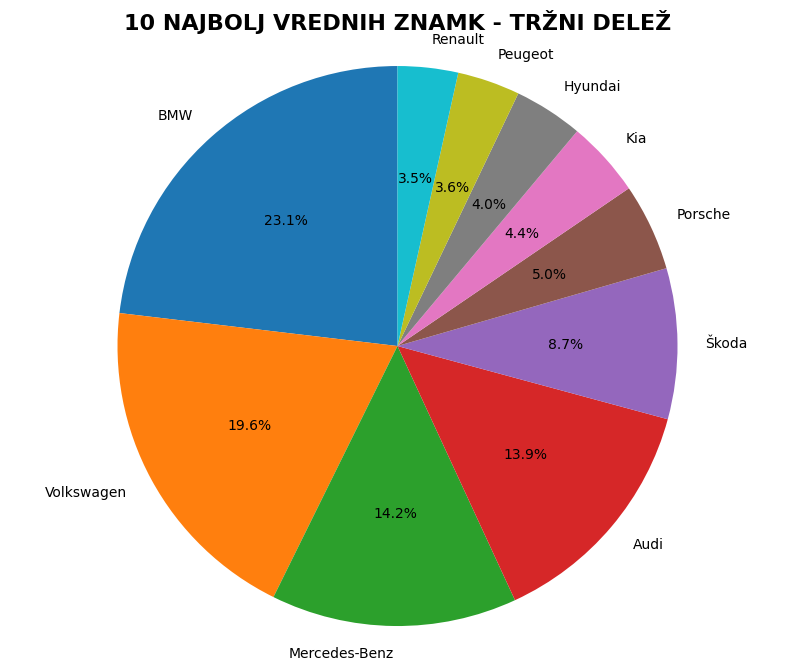

In [3]:
podatki = pd.read_csv("oglasi_avto.csv")
podatki = podatki[podatki["Cena_stevilka"].notna()]
skupna_vrednost_oglasov = podatki.groupby("Znamka")["Cena_stevilka"].sum()
skupna_vrednost_oglasov = skupna_vrednost_oglasov.sort_values(ascending=False)
najboljsih_10_znamk = skupna_vrednost_oglasov.head(10)
najslabsih_10_znamk = skupna_vrednost_oglasov.tail(10)
print("SKUPNA VREDNOST OGLASOV POSAMEZNIH ZNAMK:")
print()
print("10 NAJBOLJ VREDNIH ZNAMK:")
for znamka, vrednost in najboljsih_10_znamk.items():
     print(f"{znamka}: {vrednost:,.0f} EUR")
print()
print("10 NAJMANJ VREDNIH ZNAMK:")
for znamka, vrednost in najslabsih_10_znamk.items():
     print(f"{znamka}: {vrednost:,.0f} EUR")

plt.figure(figsize=(10, 8))
plt.pie(najboljsih_10_znamk.values, labels=najboljsih_10_znamk.index, autopct='%1.1f%%', startangle=90)
plt.title('10 NAJBOLJ VREDNIH ZNAMK - TRŽNI DELEŽ', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()


3. NAJDRAŽJI AVTOMOBILI NA AVTO.NET

Seveda me je zanimalo tudi, kateri oglas na avto.net je najdražji. Da bi bilo vse skupaj nekoliko bolj zanimivo, sem se odločila poiskati 10 najdražjih oglasov in ne le enega ter preveriti, katerim znamkam pripadajo, koliko imajo prevoženih kilometrov in podobno. Kot se je izkazalo, gre večinoma za luksuzne avtomobile znamk, kot so Porsche, BMW, Audi in Mercedes-Benz. Presenetilo pa me je, da je na prvem mestu avtomobil znamke Alfa Romeo, saj te znamke nisem pričakovala na vrhu. Ker sem sprva mislila, da gre za napako v podatkih, sem oglas ročno poiskala na spletni strani avto.net, kjer se je izkazalo, da gre za kabrioletski športni model znamke Alfa Romeo, ki se – tako kot je bilo navedeno v rezultatih – prodaja za 99.990 evrov, kar je kar 14.000 evrov več kot BMW M4 na drugem mestu. Link do najdražjega avta na mojem seznamu pa je tule: https://www.avto.net/Ads/details.asp?id=21411357&display=Alfa%20Romeo%204C za tiste ki bi si radi avto bolj natančno ogledali.

In [4]:
podatki = pd.read_csv("oglasi_avto.csv")
podatki = podatki[podatki["Cena_stevilka"].notna()]
podatki = podatki.sort_values(by="Cena_stevilka", ascending=False)
najdrazji_oglasi = podatki.head(10)
print("10 NAJDRŽJI OGLASI NA AVTO.NET:")
print()
for index, oglas in najdrazji_oglasi.iterrows():
    print(f"Znamka: {oglas['Znamka']} | Model: {oglas['Model']} | Cena: {int(oglas['Cena_stevilka'])} EUR | Prevoženi kilometri: {int(oglas['Prevozenih_km'])} | Prva registracija: {int(oglas['Prva_registracija'])}")



10 NAJDRŽJI OGLASI NA AVTO.NET:

Znamka: Alfa Romeo | Model: 4C | Cena: 99990 EUR | Prevoženi kilometri: 19000 | Prva registracija: 2015
Znamka: BMW | Model: M4 | Cena: 85990 EUR | Prevoženi kilometri: 47000 | Prva registracija: 2023
Znamka: Porsche | Model: Cayenne | Cena: 83990 EUR | Prevoženi kilometri: 106000 | Prva registracija: 2019
Znamka: BMW | Model: serija 8 | Cena: 83880 EUR | Prevoženi kilometri: 15284 | Prva registracija: 2023
Znamka: BMW | Model: M3 | Cena: 79850 EUR | Prevoženi kilometri: 46850 | Prva registracija: 2022
Znamka: Mercedes-Benz | Model: GLE | Cena: 75000 EUR | Prevoženi kilometri: 115000 | Prva registracija: 2020
Znamka: Porsche | Model: Panamera | Cena: 69999 EUR | Prevoženi kilometri: 69096 | Prva registracija: 2020
Znamka: Porsche | Model: Cayenne | Cena: 68780 EUR | Prevoženi kilometri: 125000 | Prva registracija: 2019
Znamka: Audi | Model: RS4 | Cena: 67000 EUR | Prevoženi kilometri: 86000 | Prva registracija: 2020
Znamka: Mercedes-Benz | Model: E-Razr

4. ŠTEVILO AVTOMOBILOV GLEDE NA LETO PRVE REGISTRACIJE

Ker so med avtomobili na voljo tako starejša kot novejša vozila, sem se odločila preveriti, katero leto prve registracije je med oglasi najbolj zastopano. Rezultate sem prikazala s pomočjo stolpičnega diagrama. Kot lahko vidimo na spodnjem prikazu, je bilo največ vozil, ki se trenutno prodajajo na avto.net, prvič registriranih leta 2019. Število novejših in starejših vozil na strani se nato približno enakomerno zmanjšuje, ko se oddaljujemo od leta 2019, bodisi naprej bodisi nazaj glede na leto prve registracije.

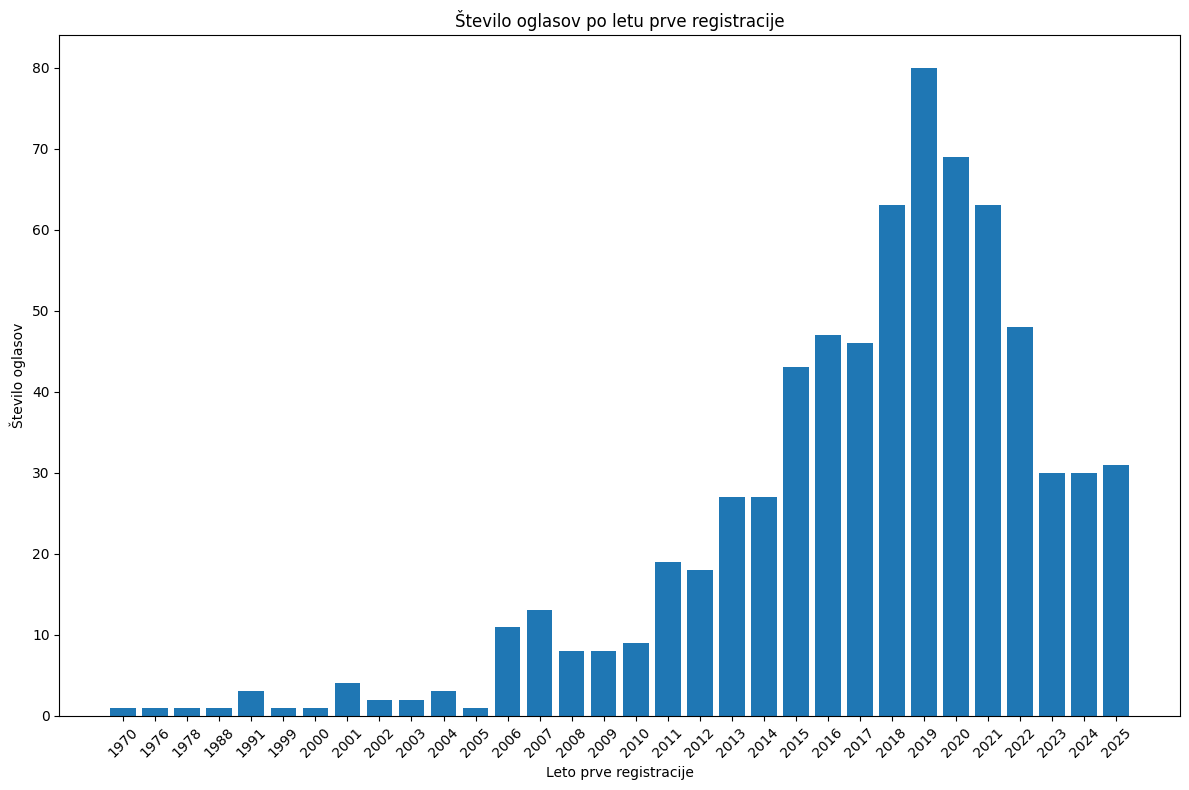

In [5]:
podatki = pd.read_csv("oglasi_avto.csv")
podatki = podatki[podatki["Prva_registracija"].notna()]
podatki = podatki[podatki["Prva_registracija"] != "0"]
podatki["Prva_registracija"] = podatki["Prva_registracija"].astype(int)
podatki = podatki.groupby("Prva_registracija")["Prva_registracija"].count()
podatki = podatki.sort_index(ascending=True)

plt.figure(figsize=(12, 8))
x_positions = range(len(podatki.index))
plt.bar(x_positions, podatki.values)
plt.xticks(x_positions, podatki.index, rotation=45, ha='center')
plt.xlabel("Leto prve registracije")
plt.ylabel("Število oglasov")
plt.title("Število oglasov po letu prve registracije")
plt.tight_layout()
plt.show()



5. KORELACIJA MED LETOM PRVE REGISTRACIJE IN CENO VOZIL

Ko sem ugotovila, kako so oglasi razporejeni glede na leto prve registracije, sem se odločila preveriti še, kako leto prve registracije korelira s ceno avtomobilov. Zanima me je bilo, ali so starejša vozila cenejša od novejših. To sem prikazala s pomočjo stolpičnega diagrama. Iz podatkov je lepo razvidno, da so novejši avtomobili tudi dražji. Kot sem pričakovala, se pri zelo starih vozilih trend nekoliko obrne, saj ta že sodijo v kategorijo oldtimerjev, kjer so cene ponovno nekoliko višje.

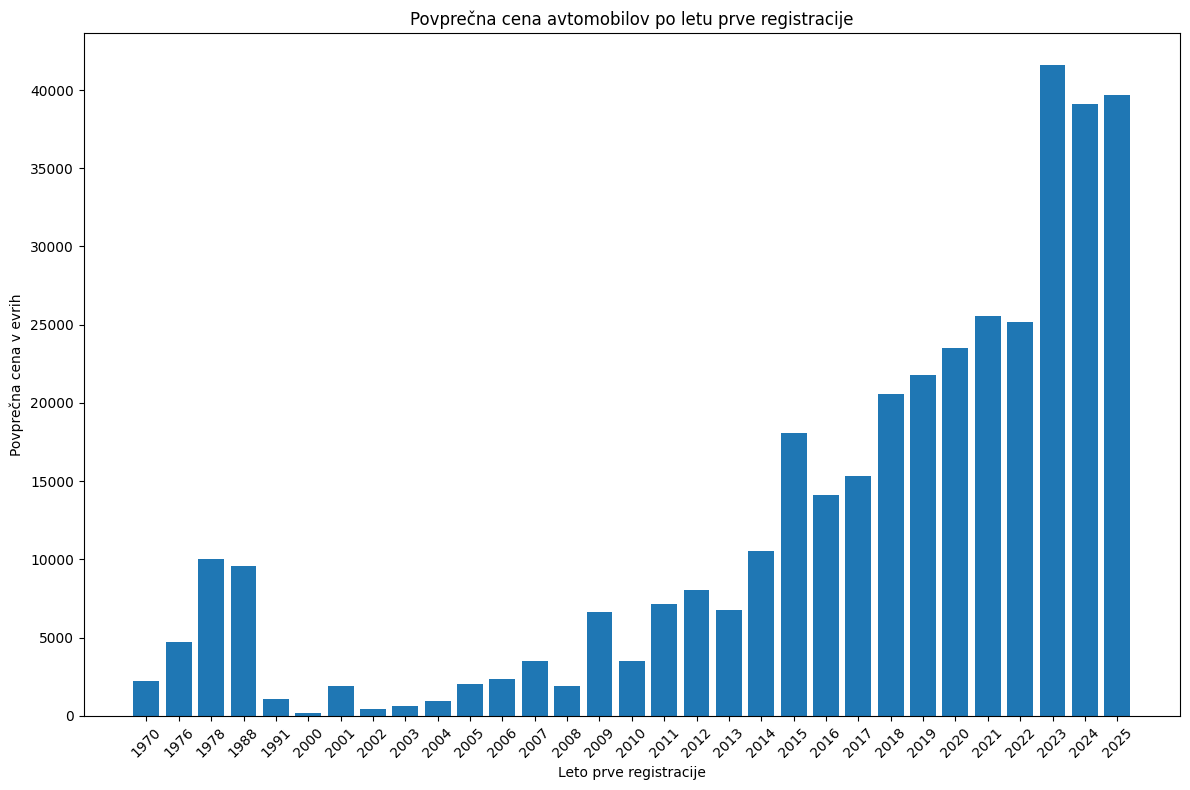

In [6]:
podatki = pd.read_csv("oglasi_avto.csv")
podatki = podatki[podatki["Prva_registracija"].notna()]
podatki = podatki[podatki["Prva_registracija"] != "0"]
podatki = podatki[podatki["Cena_stevilka"].notna()]
podatki["Prva_registracija"] = podatki["Prva_registracija"].astype(int)
podatki = podatki.groupby("Prva_registracija")["Cena_stevilka"].mean().round().astype(int).sort_index(ascending=True)

plt.figure(figsize=(12, 8))
x_positions = range(len(podatki.index))
plt.bar(x_positions, podatki.values)
plt.xticks(x_positions, podatki.index, rotation=45, ha='center')
plt.xlabel("Leto prve registracije")
plt.ylabel("Povprečna cena v evrih")
plt.title("Povprečna cena avtomobilov po letu prve registracije")
plt.tight_layout()
plt.show()


6. GENERALNA ANLIZA CENE 

Zadnja stvar, ki sem jo izračunala glede cen vozil, je bil splošni cenovni razpon. Želela sem ugotoviti predvsem, kakšen je razpon od najcenejšega do najdražjega avtomobila, kakšna je povprečna cena ter kakšen je standardni odklon od povprečne cene vozil. To sem prikazala s pomočjo box-plot diagrama. Pri top 5 znamkah je razvidno, da imajo premium znamke, kot sta BMW in Mercedes-Benz, bistveno širši cenovni razpon in višje mediane cen kot Volkswagen, Audi in Renault, pri katerem so cene v povprečju najnižje. Pri vseh znamkah se pojavljajo tudi izstopajoče vrednosti, ki predstavljajo dražje modele oziroma posebne izvedbe. Če pogledamo celoten trg, se večina vozil prodaja po cenah med približno 10.000 in 25.000 evri, medtem ko posamezni dražji avtomobili močno izstopajo in segajo celo do okoli 100.000 evrov. Vizualizacija tako jasno pokaže razlike med znamkami ter potrjuje, da trg zaznamujejo tako cenovno dostopna kot tudi izrazito luksuzna vozila.

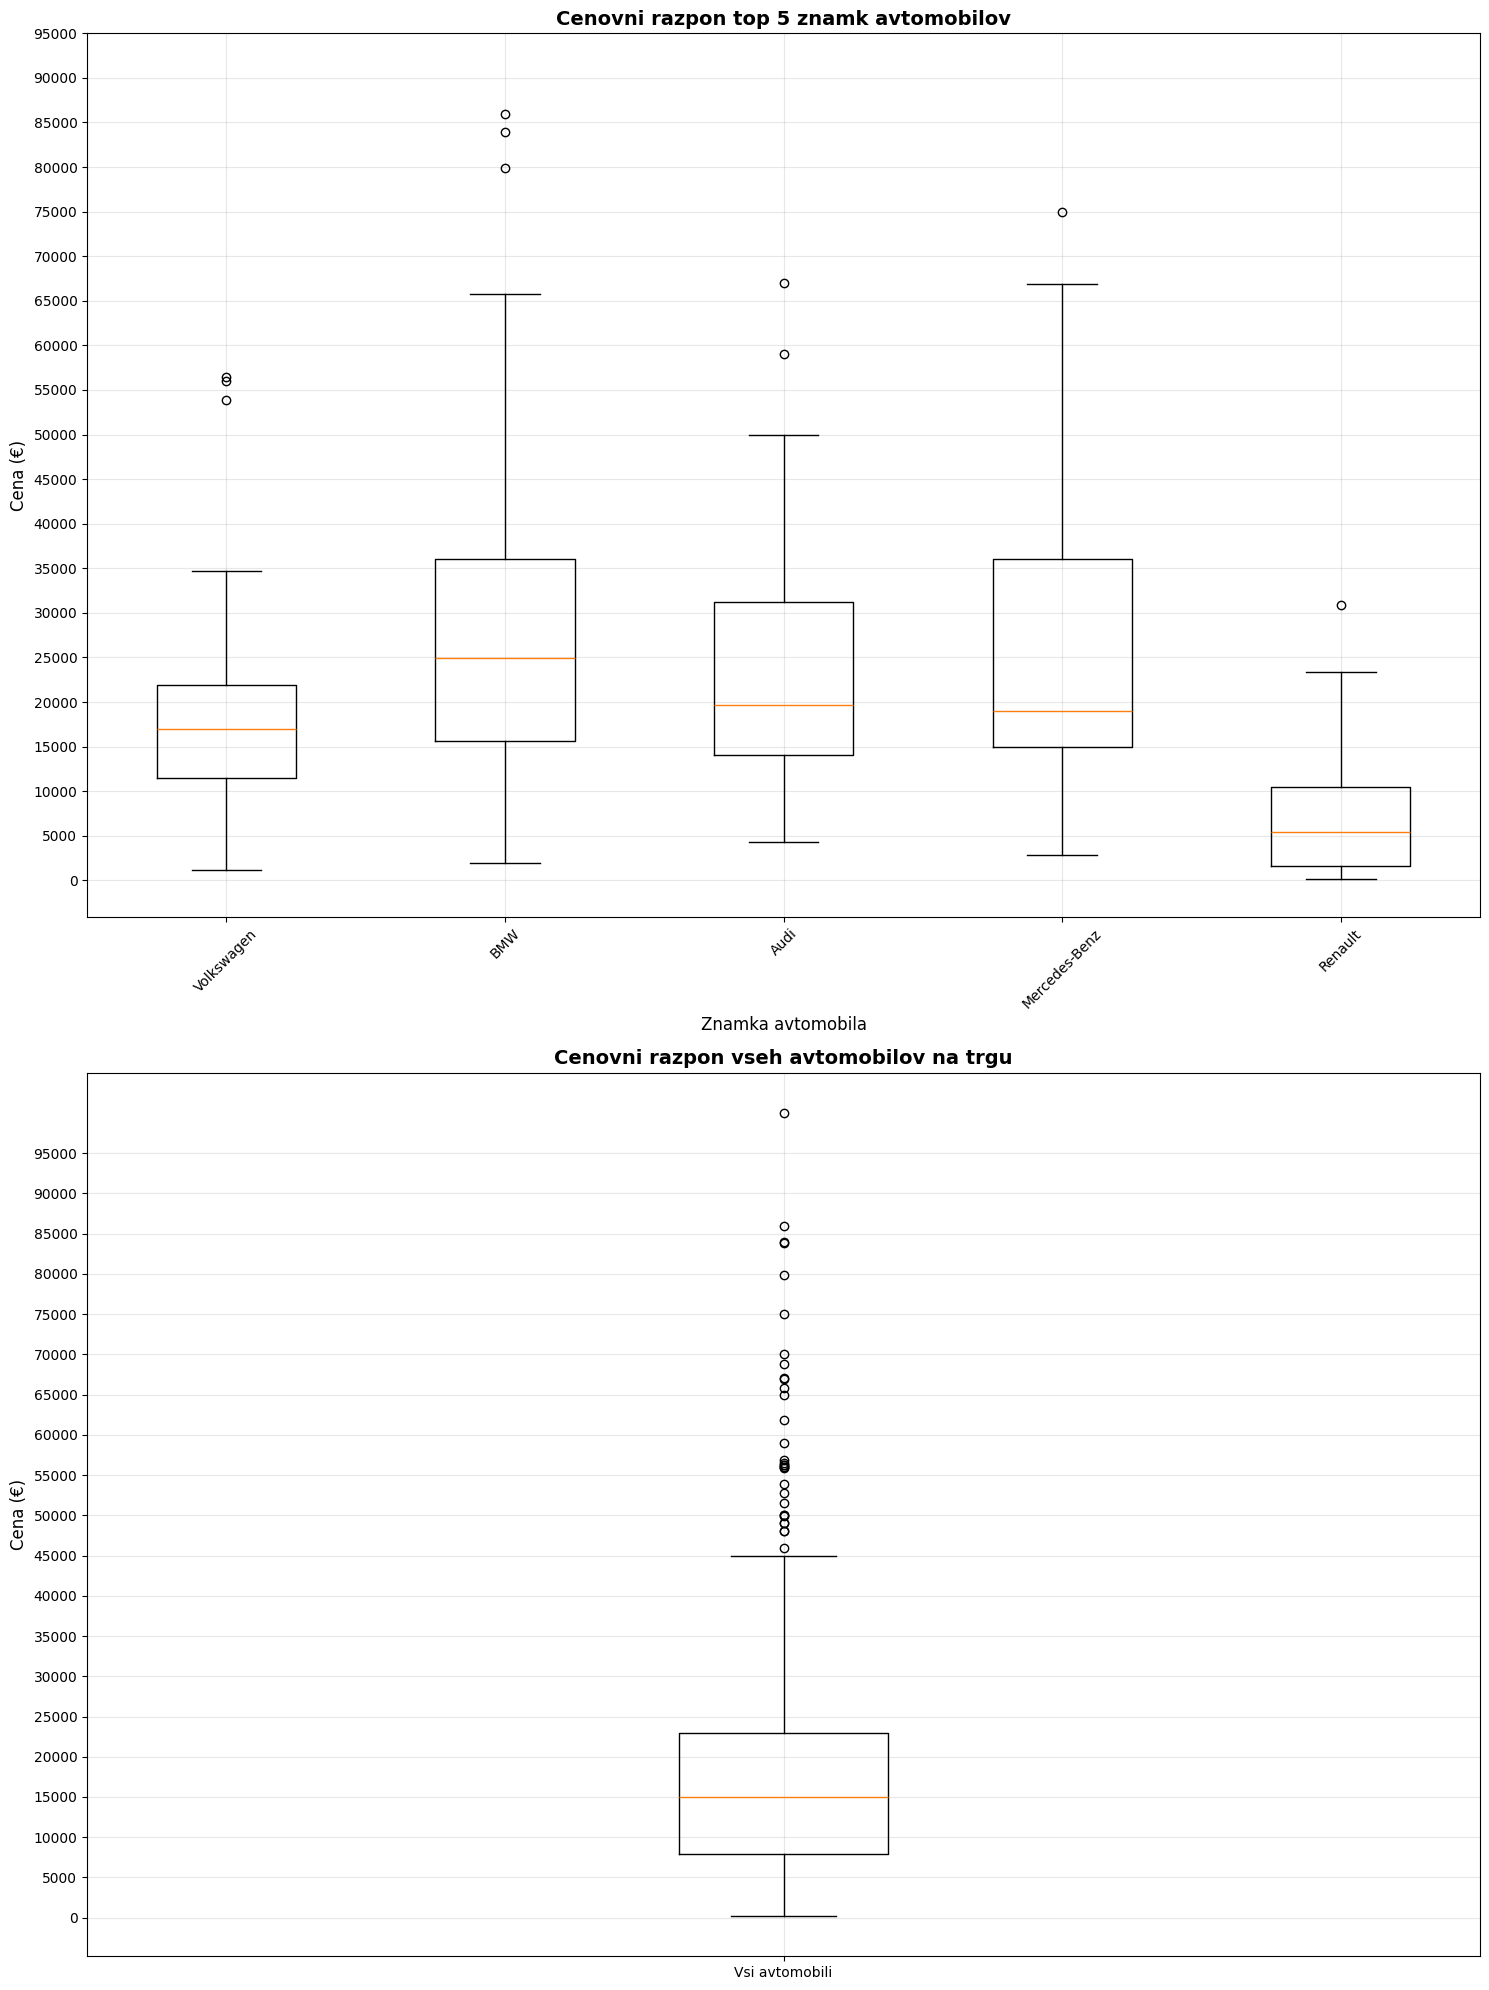

STATISTIKE TOP 5 ZNAMK:

Volkswagen:
  Število oglasov: 77
  Povprečna cena: 17,687 €
  Standardni odklon: 10,792 €
  Mediana: 16,950 €
  Min: 1,200 €
  Max: 56,490 €

BMW:
  Število oglasov: 53
  Povprečna cena: 30,350 €
  Standardni odklon: 20,202 €
  Mediana: 24,990 €
  Min: 1,950 €
  Max: 85,990 €

Audi:
  Število oglasov: 40
  Povprečna cena: 24,171 €
  Standardni odklon: 14,479 €
  Mediana: 19,690 €
  Min: 4,290 €
  Max: 67,000 €

Mercedes-Benz:
  Število oglasov: 37
  Povprečna cena: 26,694 €
  Standardni odklon: 17,807 €
  Mediana: 18,990 €
  Min: 2,800 €
  Max: 75,000 €

Renault:
  Število oglasov: 33
  Povprečna cena: 7,343 €
  Standardni odklon: 7,245 €
  Mediana: 5,390 €
  Min: 200 €
  Max: 30,900 €

SKUPNA STATISTIKA VSEH AVTOMOBILOV:

Število oglasov: 477
Povprečna cena: 18,255 €
Standardni odklon: 15,303 €
Mediana: 15,000 €
Min: 200 €
Max: 99,990 €


In [7]:
podatki = pd.read_csv("oglasi_avto.csv")
podatki = podatki.dropna(subset=['Cena_stevilka'])
podatki = podatki[podatki['Cena_stevilka'] > 0]

podatki["Cena_stevilka"] = podatki["Cena_stevilka"].astype(int)

st_vseh_oglsov = len(podatki)
st_oglsov_znamke = podatki.groupby("Znamka")["Znamka"].count()
deset_najvecjih_znamk = st_oglsov_znamke.sort_values(ascending=False).head(10)

top_5_znamke = deset_najvecjih_znamk.head(5).index
box_data = [podatki[podatki['Znamka'] == znamka]['Cena_stevilka'].values for znamka in top_5_znamke]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))

ax1.boxplot(box_data, tick_labels=top_5_znamke)
ax1.set_title('Cenovni razpon top 5 znamk avtomobilov', fontsize=14, fontweight='bold')
ax1.set_ylabel('Cena (€)', fontsize=12)
ax1.set_xlabel('Znamka avtomobila', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

ax2.boxplot(podatki['Cena_stevilka'].values, tick_labels=['Vsi avtomobili'])
ax2.set_title('Cenovni razpon vseh avtomobilov na trgu', fontsize=14, fontweight='bold')
ax2.set_ylabel('Cena (€)', fontsize=12)
ax2.grid(True, alpha=0.3)

ax1.set_yticks(range(0, int(podatki['Cena_stevilka'].max()) + 1, 5000))
ax2.set_yticks(range(0, int(podatki['Cena_stevilka'].max()) + 1, 5000))

plt.tight_layout()
plt.show()

print("STATISTIKE TOP 5 ZNAMK:")
print()
for znamka in top_5_znamke:
    cene_znamke = podatki[podatki['Znamka'] == znamka]['Cena_stevilka']
    print(f"{znamka}:")
    print(f"  Število oglasov: {len(cene_znamke)}")
    print(f"  Povprečna cena: {cene_znamke.mean():,.0f} €")
    print(f"  Standardni odklon: {cene_znamke.std():,.0f} €")
    print(f"  Mediana: {cene_znamke.median():,.0f} €")
    print(f"  Min: {cene_znamke.min():,.0f} €")
    print(f"  Max: {cene_znamke.max():,.0f} €")
    print()

print("SKUPNA STATISTIKA VSEH AVTOMOBILOV:")
print()
print(f"Število oglasov: {len(podatki)}")
print(f"Povprečna cena: {podatki['Cena_stevilka'].mean():,.0f} €")
print(f"Standardni odklon: {podatki['Cena_stevilka'].std():,.0f} €")
print(f"Mediana: {podatki['Cena_stevilka'].median():,.0f} €")
print(f"Min: {podatki['Cena_stevilka'].min():,.0f} €")
print(f"Max: {podatki['Cena_stevilka'].max():,.0f} €")

7. ZASTOPANOS RAZLLIČNIH VRST MOTORJEV (BENCINSKI, DIZELSKI, ELEKTRIČNI, HIBRIDNI) IN ZASTOPANOST ELEKTRIČNIH VOZIL NA TRGU

Ker so v zadnjih letih električni avtomobili postali precej priljubljeni in jih je vse pogosteje moč videti tudi na cestah, sem pripravila nekaj statistike o tem, koliko takih avtomobilov je trenutno na trgu rabljenih vozil in kako se je njihovo število spreminjalo skozi leta. Na prvem tortnem diagramu je lepo razvidno, da večino trga še vedno predstavljajo vozila z bencinskimi ali dizelskimi motorji, medtem ko je avtomobilov s hibridnim ali električnim motorjem bistveno manj. Najbolj pa sta me presenetili dve dodatni kategoriji, za kateri prej sploh nisem vedela, da obstajata – CNG in LPG.
CNG in LPG sta posebni vrsti goriva, ki ju nekateri avtomobili uporabljajo kot alternativo bencinu ali dizlu. CNG (Compressed Natural Gas) pomeni stisnjen zemeljski plin. Avtomobili na CNG imajo posebne rezervoarje pod visokim tlakom, kjer je shranjen zemeljski plin (predvsem metan). Prednost tega goriva je nižja cena in manjši izpusti CO₂ ter drugih škodljivih plinov v primerjavi z bencinom ali dizlom, slabost pa manjša razširjenost polnilnic in nekoliko krajši doseg. LPG (Liquefied Petroleum Gas) pomeni utekočinjen naftni plin, ki je mešanica propana in butana, shranjena v tekočem stanju pod zmernim tlakom. LPG je precej bolj razširjen kot CNG, polnilnic je več, predelava vozil pa je enostavnejša in cenovno ugodnejša. Tudi pri LPG so izpusti praviloma nižji kot pri bencinu.
Na zadnji vizualizaciji v poročilu sem prikazala, kako se je število električnih vozil na trgu rabljenih avtomobilov spreminjalo skozi leta. Iz grafa je razvidno, da so se električni avtomobili začeli pojavljati šele leta 2017. Od takrat je njihova ponudba rasla in vrhunec dosegla leta 2022, nato pa upadla, tako da leta 2024 ni bilo na voljo niti enega električnega vozila. V letošnjem letu se ponudba sicer ponovno vrača na raven izpred dveh let, a je število električnih avtomobilov še vedno precej majhno, kar me nekoliko preseneča, saj sem imela občutek, da takšna vozila v zadnjem času postajajo vse bolj priljubljena.

STATISTIKE PO VRSTI GORIVA:

dizel: 406 oglasov (50.2%)
bencin: 345 oglasov (42.7%)
hibrid: 28 oglasov (3.5%)
elektro: 26 oglasov (3.2%)
CNG: 2 oglasov (0.2%)
LPG: 1 oglasov (0.1%)


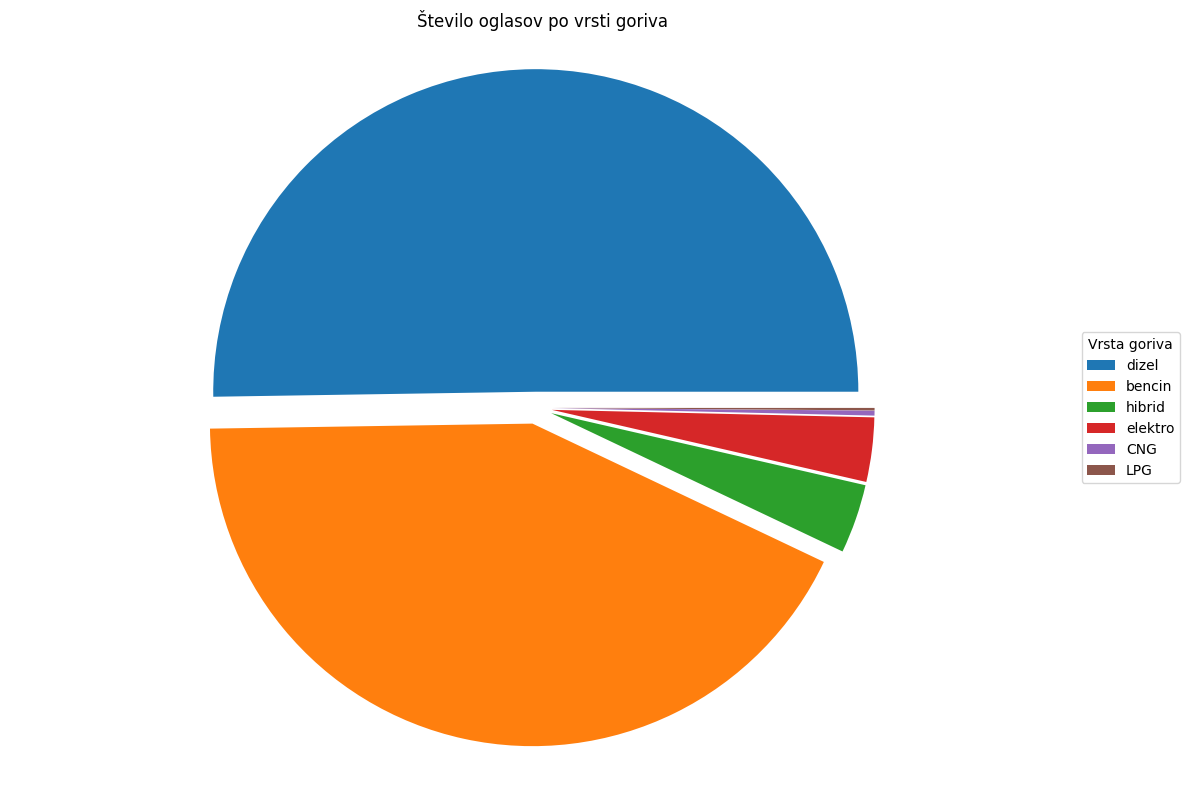

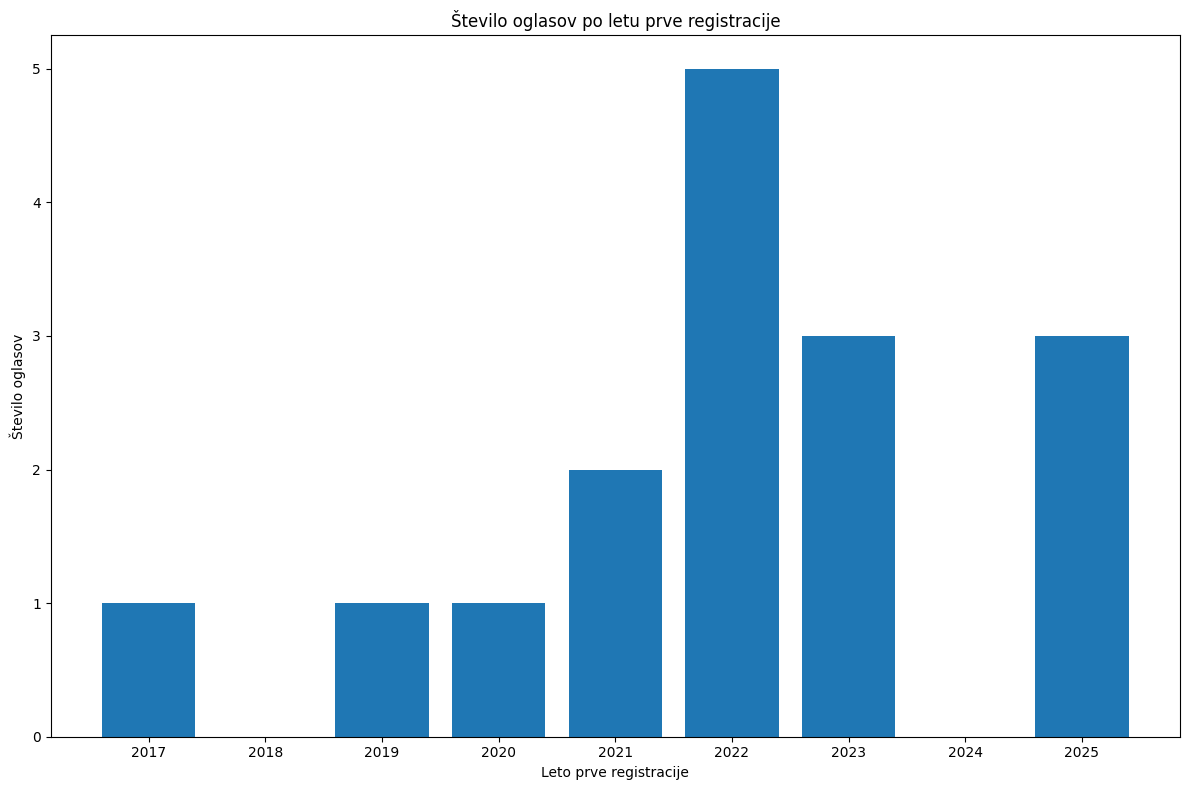

In [11]:
podatki = pd.read_csv("oglasi_avto.csv")
podatki = podatki[podatki["Gorivo"].notna()]
st_vseh_oglsov = len(podatki)
podatki = podatki.groupby("Gorivo")["Gorivo"].count()
podatki = podatki.sort_values(ascending=False)
print("STATISTIKE PO VRSTI GORIVA:")
print()
for gorivo, st_oglasov in podatki.items():
    odstotek = (st_oglasov / st_vseh_oglsov) * 100
    print(f"{gorivo}: {st_oglasov} oglasov ({odstotek:.1f}%)")

explode = [0.05] * len(podatki) 

plt.figure(figsize=(12, 8))
plt.pie(podatki.values, labels=None, autopct=None, explode=explode)
plt.title("Število oglasov po vrsti goriva")
plt.legend(podatki.index, title="Vrsta goriva", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')
plt.tight_layout()
plt.show()

podatki = pd.read_csv("oglasi_avto.csv")
samo_elektricni = podatki[podatki["Gorivo"] == "elektro"]
elektricni_po_letih = samo_elektricni.groupby("Prva_registracija")["Prva_registracija"].count()
plt.figure(figsize=(12, 8))
plt.bar(elektricni_po_letih.index, elektricni_po_letih.values)
plt.xlabel("Leto prve registracije")
plt.ylabel("Število oglasov")
plt.title("Število oglasov po letu prve registracije")

# Popravka: preverimo ali so indeksi numerični
if len(elektricni_po_letih) > 0:
    min_leto = int(elektricni_po_letih.index.min())
    max_leto = int(elektricni_po_letih.index.max())
    plt.xticks(range(min_leto, max_leto + 1, 1))

plt.tight_layout()
plt.show()




V zaključku lahko povzamem, da je analiza oglasov s spletne strani avto.net pokazala številne zanimive trende na trgu rabljenih vozil. S pomočjo pridobljenih in obdelanih podatkov sem raziskala zastopanost posameznih znamk, njihovo skupno vrednost ter razlike v cenovnih razponih. Primerjava med tržnim deležem in skupno vrednostjo oglasov je pokazala, da najbolj zastopane znamke niso nujno tudi najvrednejše, saj so pri slednjih v ospredju predvsem premium proizvajalci. Poleg tega sem z analizo let prve registracije ugotovila, da prevladujejo vozila registrirana leta 2019, medtem ko pri cenah prihaja do jasne povezave med letom in vrednostjo vozil. Posebej zanimivi so tudi podatki o električnih avtomobilih, katerih ponudba je v zadnjih letih nihala, a še vedno predstavlja manjši del trga. Vse skupaj kaže, da kombinacija programiranja in analize podatkov omogoča boljše razumevanje avtomobilskega trga ter potrjuje, da lahko s takšnim pristopom pridobimo dragocen vpogled v realno stanje ponudbe rabljenih vozil.